In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series
import os
%matplotlib inline

In [3]:
# Open the excel file as an object

filedir = os.path.expanduser('~')+'/Desktop/Chan Lab/Labwork/'

filenoext = '2015-09-30 UV-vis AuNP and AgNP clusters'

xlsfile = pd.ExcelFile(filedir+filenoext+'.xlsx')

In [4]:
# Parse the selected sheet of the excel file and set as DataFrame
dframe = xlsfile.parse('Sheet2')
dframe.head()

,Wavelength (nm),AuNP,AgNP,AuNP Clusters,AgNP Clusters
0,350.009796,0.696011,0.215161,0.038307,0.040718
1,350.943878,0.695761,0.222349,0.038104,0.040840
2,352.033478,0.695135,0.232905,0.038318,0.041397
3,352.967285,0.694639,0.242191,0.038210,0.041570
4,354.056580,0.693091,0.250710,0.038207,0.041711


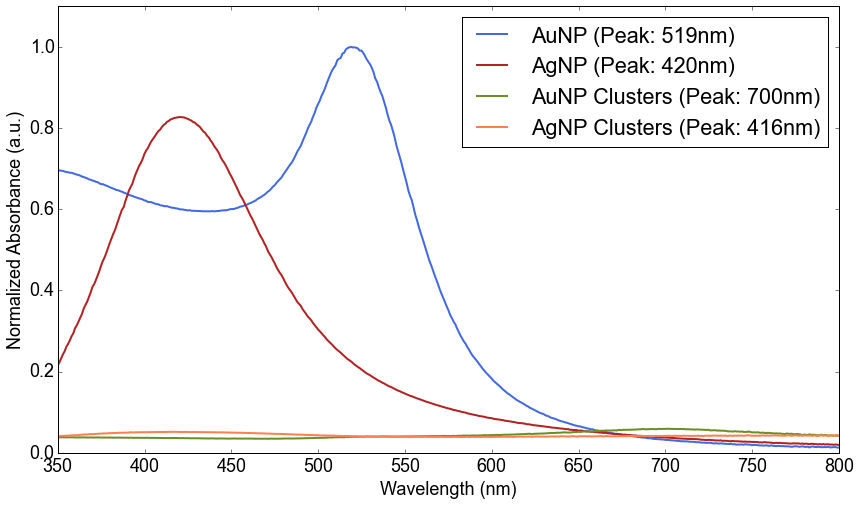

In [78]:
"""
Single box plot with legend
"""


plt.rc('font', family = 'Arial', size='18')


ColorScheme = ['RoyalBlue', 'FireBrick', 'OliveDrab', 'Coral', 'DarkViolet', 'DarkCyan', 
               'CornflowerBlue', 'SaddleBrown', 'YellowGreen', 'DarkTurquoise']


# Convert dframe columns to list, first list entry is X-axis others are data labels
Labels = list(dframe.columns)


# For UV-vis data, add peak location to label name
pkcalc = dframe.ix[list(dframe.idxmax(axis=0)),0]
pklist = list(pkcalc[1:])
Labels[1:] = [m+' (Peak: '+str(int(n))+'nm)' for m,n in zip(Labels[1:],pklist)]


# Set number of plots
nPlots = len(Labels[1:])


# Create x,y values
xx = np.array(dframe.ix[:,0])
yy = np.array(dframe.ix[:,1:])


# Create figure and add plots
fig = plt.figure(figsize=(14,8))


for i in range(nPlots):
    plt.plot(xx,yy[:,i], label=Labels[i+1], color=ColorScheme[i], linewidth=2)

    
plt.xlabel(Labels[0])
# plt.xlabel(r'Wavenumber ($\mathregular{cm}^{-1}$)')
plt.ylabel('Normalized Absorbance (a.u.)')
# plt.yticklabels([1],visible=False)
# plt.yticks(np.arange(0, np.max(yy), 0.5))
plt.xlim(350,800)
plt.ylim(0,1.1)


# Shrink current axis by 20% to place legend outside box if needed
# box = Axlst.get_position()
# Axlst.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Axlst.legend(bbox_to_anchor=(1,0.5),loc='center left')
plt.legend(loc='best')


# Save figure to png file on Mac user's Desktop without overwriting existing files
desktopdir = os.path.expanduser('~')+'/Desktop/'
s=0
while os.path.isfile(desktopdir+'untitled-'+str(s)+'.png') is True:
    s+=1
plt.savefig(desktopdir+'untitled-'+str(s)+'.png', dpi=150)
